<a href="https://colab.research.google.com/github/indahnr/Deep_Learning/blob/main/Week_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AlexNet

In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 8.6 MB/s 


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

The Data

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

11501568/11490434 [==============================] - 0s 0us/step


The Model

In [ ]:
model = models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                        

In [ ]:
model.compile(optimizer='adam',loss=losses.sparse_categorical_crossentropy,  metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 204s 211ms/step - loss: 0.4545 - accuracy: 0.8367 - val_loss: 0.0873 - val_accuracy: 0.9805
Epoch 2/40
907/907 [==============================] - 190s 210ms/step - loss: 0.1031 - accuracy: 0.9739 - val_loss: 0.0875 - val_accuracy: 0.9790
Epoch 3/40
907/907 [==============================] - 190s 210ms/step - loss: 0.0778 - accuracy: 0.9798 - val_loss: 0.0911 - val_accuracy: 0.9810
Epoch 4/40
907/907 [==============================] - 190s 210ms/step - loss: 0.0675 - accuracy: 0.9828 - val_loss: 0.0390 - val_accuracy: 0.9905
Epoch 5/40
907/907 [==============================] - 190s 210ms/step - loss: 0.0490 - accuracy: 0.9878 - val_loss: 0.0339 - val_accuracy: 0.9910
Epoch 6/40
907/907 [==============================] - 190s 210ms/step - loss: 0.0494 - accuracy: 0.9875 - val_loss: 0.0466 - val_accuracy: 0.9900
Epoch 7/40
907/907 [==============================] - 190s 210ms/step - loss: 0.0421 - accuracy: 0.9887 - val_loss: 0.0471 -

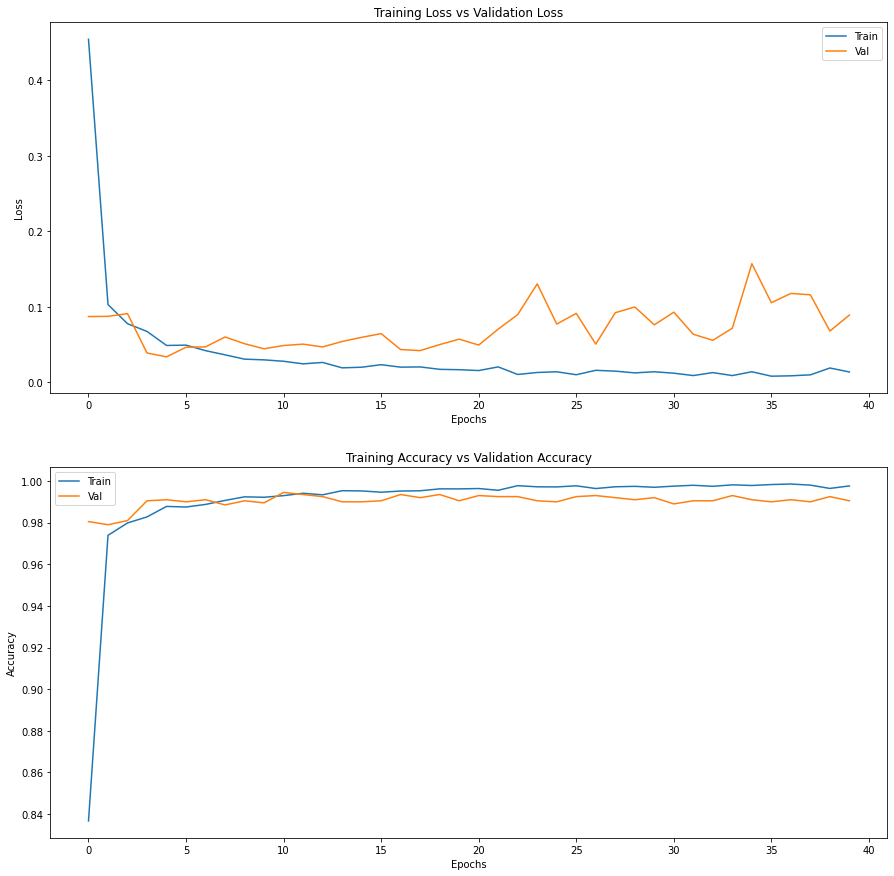

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 14s 46ms/step - loss: 0.0798 - accuracy: 0.9877


[0.07983048260211945, 0.9876999855041504]

#VGG 

Download Data

In [ ]:
from __future__ import absolute_import, division, print_function
from tqdm import tqdm
from numpy.random import randn

import pathlib
import random
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np

from matplotlib.image import imread
from keras.preprocessing import image

#tf.enable_eager_execution()
import tensorflow.compat.v1 as tf
tf.executing_eagerly()
#tf.disable_v2_behavior()
#tf.enable_eager_execution()

AUTOTUNE = tf.data.experimental.AUTOTUNE

data_dir = tf.keras.utils.get_file('flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar=True)
data_dir = pathlib.Path(data_dir)

label_names={'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
label_key=['daisy','dandelion','roses','sunflowers','tulips']

228827136/228813984 [==============================] - 3s 0us/step


Load images with tf.data

In [ ]:
all_images = list(data_dir.glob('*/*'))
all_images = [str(path) for path in all_images]
random.shuffle(all_images)

all_labels=[label_names[pathlib.Path(path).parent.name] for path in all_images]

data_size=len(all_images)

train_test_split=(int)(data_size*0.2)

x_train=all_images[train_test_split:]
x_test=all_images[:train_test_split]
y_train=all_labels[train_test_split:]
y_test=all_labels[:train_test_split]

IMG_SIZE=160

BATCH_SIZE = 32

def _parse_data(x,y):
  image = tf.read_file(x)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
 
  return image,y

def _input_fn(x,y):
  ds=tf.data.Dataset.from_tensor_slices((x,y))
  ds=ds.map(_parse_data)
  ds=ds.shuffle(buffer_size=data_size)
  
  
  ds = ds.repeat()
  
  ds = ds.batch(BATCH_SIZE)
  
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  
  return ds
  
train_ds=_input_fn(x_train,y_train)
validation_ds=_input_fn(x_test,y_test)

Create the base model from VGG16 trained convnets

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
VGG16_MODEL=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

58900480/58889256 [==============================] - 2s 0us/step


In [ ]:
VGG16_MODEL.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(len(label_names),activation='softmax')

In [ ]:
model = tf.keras.Sequential([
  VGG16_MODEL,
  global_average_layer,
  prediction_layer
])

Compile the model

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

Train the model

In [ ]:
history = model.fit(train_ds,
                    epochs=100, 
                    steps_per_epoch=2,
                    validation_steps=2,
                    validation_data=validation_ds)

Train on 2 steps, validate on 2 steps
Epoch 1/100
2/2 [==============================] - ETA: 0s - batch: 0.5000 - size: 1.0000 - loss: 1.7994 - acc: 0.2500     

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2/2 [==============================] - 18s 5s/step - batch: 0.5000 - size: 1.0000 - loss: 1.7994 - acc: 0.2500 - val_loss: 1.8841 - val_acc: 0.1562
Epoch 2/100
2/2 [==============================] - 5s 5s/step - batch: 0.5000 - size: 1.0000 - loss: 1.8389 - acc: 0.2188 - val_loss: 1.7328 - val_acc: 0.1719
Epoch 3/100
2/2 [==============================] - 5s 5s/step - batch: 0.5000 - size: 1.0000 - loss: 1.6504 - acc: 0.3125 - val_loss: 1.6721 - val_acc: 0.1719
Epoch 4/100
2/2 [==============================] - 5s 5s/step - batch: 0.5000 - size: 1.0000 - loss: 1.7395 - acc: 0.1562 - val_loss: 1.5922 - val_acc: 0.2656
Epoch 5/100
2/2 [==============================] - 5s 5s/step - batch: 0.5000 - size: 1.0000 - loss: 1.6654 - acc: 0.2188 - val_loss: 1.5595 - val_acc: 0.2812
Epoch 6/100
2/2 [==============================] - 5s 5s/step - batch: 0.5000 - size: 1.0000 - loss: 1.6216 - acc: 0.1875 - val_loss: 1.5765 - val_acc: 0.2344
Epoch 7/100
2/2 [==============================] - 5s 5s/

Evaluate Model

In [ ]:
validation_steps = 20

loss0,accuracy0 = model.evaluate(validation_ds, steps = validation_steps)

print("loss: {:.2f}".format(loss0))
print("accuracy: {:.2f}".format(accuracy0))

loss: 0.93
accuracy: 0.75


Learning curves

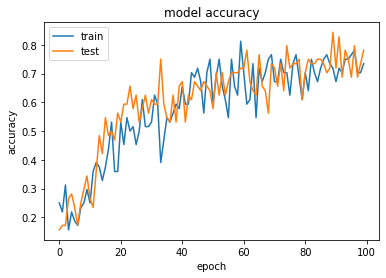

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

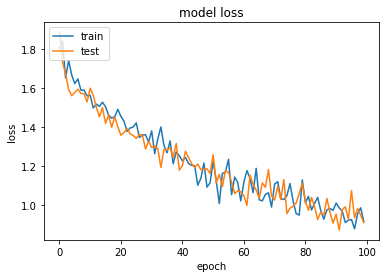

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Network in Network(NiN)

#Google Net

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

In [4]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
def inception(x,
              filters_1x1,
              filters_3x3_reduce,
              filters_3x3,
              filters_5x5_reduce,
              filters_5x5,
              filters_pool):
  path1 = layers.Conv2D(filters_1x1, (1, 1), padding='same',    activation='relu')(x)
  path2 = layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
  path2 = layers.Conv2D(filters_3x3, (1, 1), padding='same', activation='relu')(path2)
  path3 = layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
  path3 = layers.Conv2D(filters_5x5, (1, 1), padding='same', activation='relu')(path3)
  path4 = layers.MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
  path4 = layers.Conv2D(filters_pool, (1, 1), padding='same', activation='relu')(path4)
  return tf.concat([path1, path2, path3, path4], axis=3)

In [6]:
inp = layers.Input(shape=(32, 32, 3))
input_tensor = layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:])(inp)
x = layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(input_tensor)
x = layers.MaxPooling2D(3, strides=2)(x)
x = layers.Conv2D(64, 1, strides=1, padding='same', activation='relu')(x)
x = layers.Conv2D(192, 3, strides=1, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(3, strides=2)(x)
x = inception(x, filters_1x1=64, filters_3x3_reduce=96, filters_3x3=128, filters_5x5_reduce=16, filters_5x5=32, filters_pool=32)
x = inception(x, filters_1x1=128, filters_3x3_reduce=128, filters_3x3=192, filters_5x5_reduce=32, filters_5x5=96, filters_pool=64)
x = layers.MaxPooling2D(3, strides=2)(x)
x = inception(x, filters_1x1=192, filters_3x3_reduce=96, filters_3x3=208, filters_5x5_reduce=16, filters_5x5=48, filters_pool=64)
aux1 = layers.AveragePooling2D((5, 5), strides=3)(x)
aux1 =layers.Conv2D(128, 1, padding='same', activation='relu')(aux1)
aux1 = layers.Flatten()(aux1)
aux1 = layers.Dense(1024, activation='relu')(aux1)
aux1 = layers.Dropout(0.7)(aux1)
aux1 = layers.Dense(10, activation='softmax')(aux1)
x = inception(x, filters_1x1=160, filters_3x3_reduce=112, filters_3x3=224, filters_5x5_reduce=24, filters_5x5=64, filters_pool=64)
x = inception(x, filters_1x1=128, filters_3x3_reduce=128, filters_3x3=256, filters_5x5_reduce=24, filters_5x5=64, filters_pool=64)
x = inception(x, filters_1x1=112, filters_3x3_reduce=144, filters_3x3=288, filters_5x5_reduce=32, filters_5x5=64, filters_pool=64)
aux2 = layers.AveragePooling2D((5, 5), strides=3)(x)
aux2 =layers.Conv2D(128, 1, padding='same', activation='relu')(aux2)
aux2 = layers.Flatten()(aux2)
aux2 = layers.Dense(1024, activation='relu')(aux2)
aux2 = layers.Dropout(0.7)(aux2) 
aux2 = layers.Dense(10, activation='softmax')(aux2)
x = inception(x, filters_1x1=256, filters_3x3_reduce=160, filters_3x3=320, filters_5x5_reduce=32, filters_5x5=128, filters_pool=128)
x = layers.MaxPooling2D(3, strides=2)(x)
x = inception(x, filters_1x1=256, filters_3x3_reduce=160, filters_3x3=320, filters_5x5_reduce=32, filters_5x5=128, filters_pool=128)
x = inception(x, filters_1x1=384, filters_3x3_reduce=192, filters_3x3=384, filters_5x5_reduce=48, filters_5x5=128, filters_pool=128)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
out = layers.Dense(10, activation='softmax')(x)

In [7]:
model = Model(inputs = inp, outputs = [out, aux1, aux2])

In [8]:
model.compile(optimizer='adam', 
              loss=[losses.sparse_categorical_crossentropy,
                    losses.sparse_categorical_crossentropy,
                    losses.sparse_categorical_crossentropy],
              loss_weights=[1, 0.3, 0.3],metrics=['accuracy'])

In [9]:
history = model.fit(x_train, [y_train, y_train, y_train], validation_data=(x_val, [y_val, y_val, y_val]), batch_size=64, epochs=40)


Epoch 1/40
907/907 [==============================] - 365s 383ms/step - loss: 1.1547 - dense_4_loss: 0.8469 - dense_1_loss: 0.4938 - dense_3_loss: 0.5324 - dense_4_accuracy: 0.6995 - dense_1_accuracy: 0.8317 - dense_3_accuracy: 0.8191 - val_loss: 0.1944 - val_dense_4_loss: 0.1459 - val_dense_1_loss: 0.0678 - val_dense_3_loss: 0.0940 - val_dense_4_accuracy: 0.9560 - val_dense_1_accuracy: 0.9785 - val_dense_3_accuracy: 0.9720
Epoch 2/40
907/907 [==============================] - 345s 381ms/step - loss: 0.2200 - dense_4_loss: 0.1539 - dense_1_loss: 0.1059 - dense_3_loss: 0.1145 - dense_4_accuracy: 0.9541 - dense_1_accuracy: 0.9673 - dense_3_accuracy: 0.9651 - val_loss: 0.0943 - val_dense_4_loss: 0.0610 - val_dense_1_loss: 0.0628 - val_dense_3_loss: 0.0483 - val_dense_4_accuracy: 0.9805 - val_dense_1_accuracy: 0.9850 - val_dense_3_accuracy: 0.9855
Epoch 3/40
907/907 [==============================] - 344s 379ms/step - loss: 0.1493 - dense_4_loss: 0.1025 - dense_1_loss: 0.0732 - dense_3_los

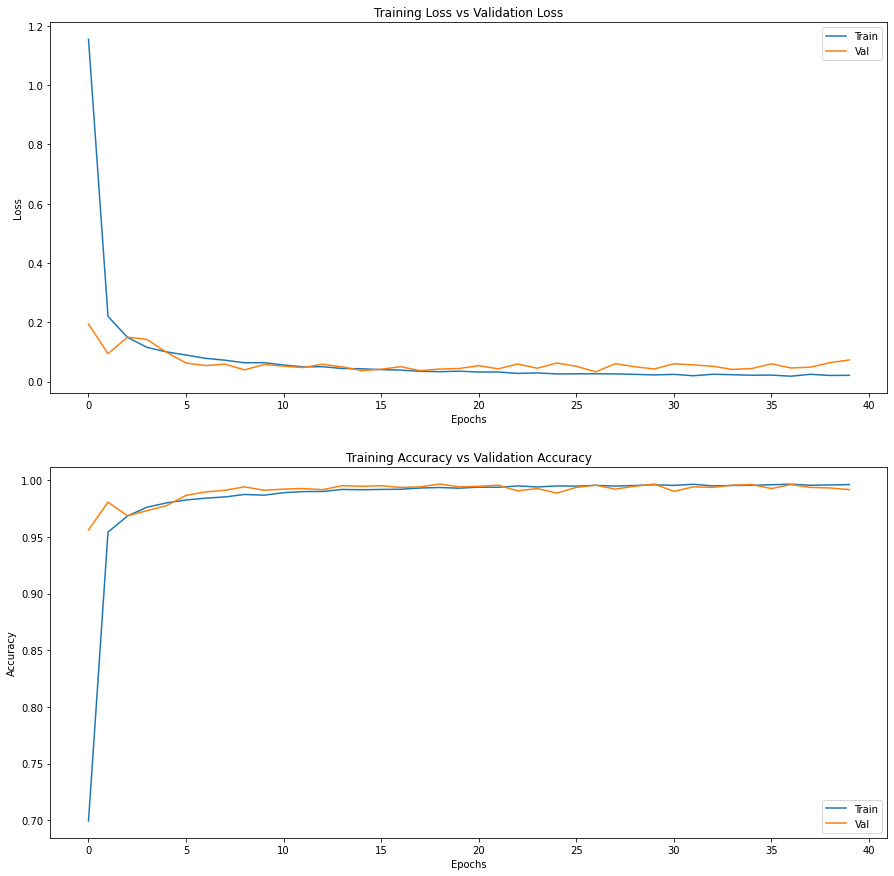

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['dense_4_accuracy'])
axs[1].plot(history.history['val_dense_4_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 25s 72ms/step - loss: 0.0612 - dense_4_loss: 0.0406 - dense_1_loss: 0.0353 - dense_3_loss: 0.0335 - dense_4_accuracy: 0.9886 - dense_1_accuracy: 0.9913 - dense_3_accuracy: 0.9898


[0.06122823432087898,
 0.04057164490222931,
 0.035340894013643265,
 0.03351447731256485,
 0.9886000156402588,
 0.9912999868392944,
 0.989799976348877]